In [9]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Leer el archivo CSV usando el delimitador ';'
df = pd.read_csv('lenguajes_ordenados.csv', delimiter=',')

df.head()

,Lenguajes,Porcentaje,Cambio
0,Python,16.925,-0.284
1,Java,11.708,0.393
2,Go,10.262,-0.162
3,JavaScript,9.859,0.306
4,C++,9.459,-0.824


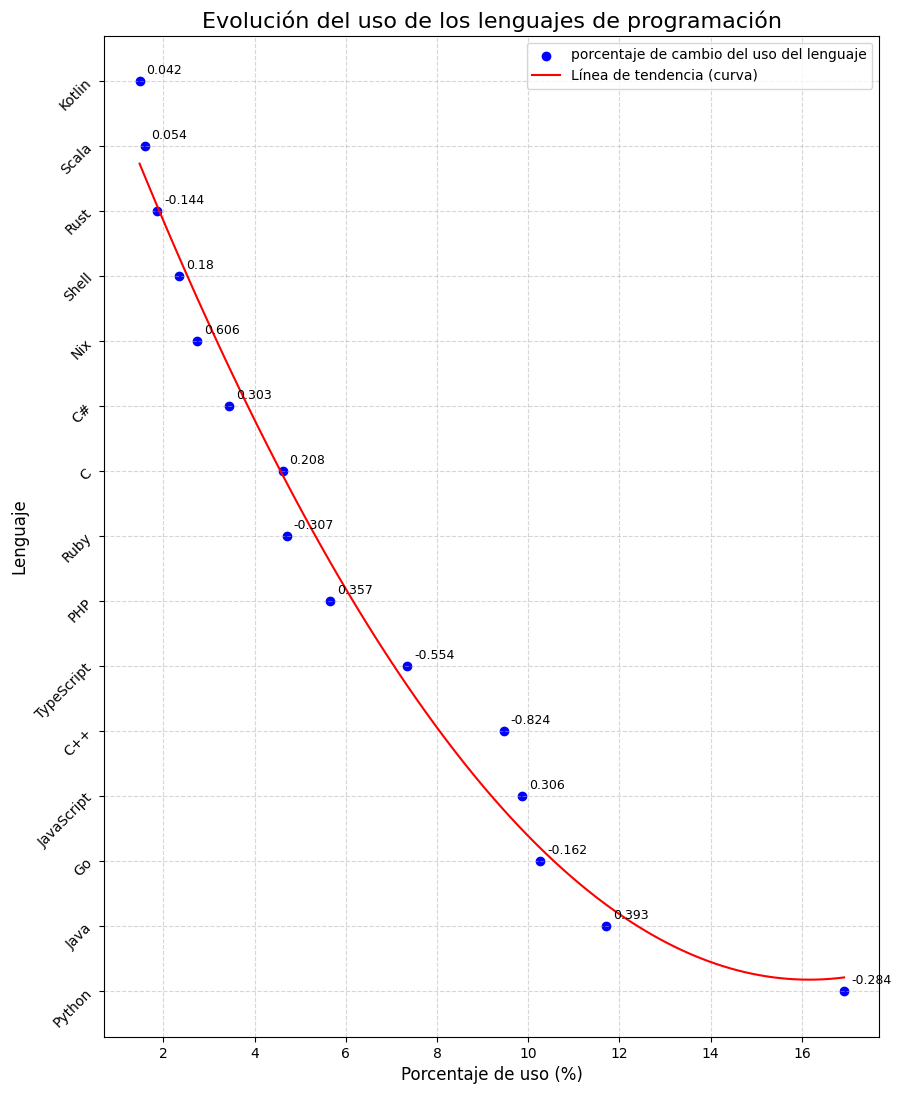

In [19]:
# Asignar valores numéricos a los lenguajes para calcular la línea de tendencia
df['nombre_numerico'] = range(len(df))  # Crear índices numéricos para los lenguajes
y= df['nombre_numerico']
x = df['Porcentaje']
point = df['Cambio']  


# Ajustar los datos a un polinomio de grado 2 (curva)
coeficientes = np.polyfit(x, y, 2)  # Grado 2
polinomio = np.poly1d(coeficientes)

# Generar valores de la línea de tendencia
x_linea = np.linspace(x.min(), x.max(), 100)  # Valores de X para la curva
y_linea = polinomio(x_linea)  # Valores de Y según el polinomio


plt.figure(figsize=(10, 13))
# Agregar etiquetas con el nombre del trabajo en cada punto
for i in range(len(point)):
    plt.annotate(point[i], (x[i], y[i]), textcoords="offset points", xytext=(5, 5), ha='left', fontsize=9)
plt.scatter(x, y, marker='o', color='blue', label="porcentaje de cambio del uso del lenguaje")
plt.plot(x_linea, y_linea, color='red', label="Línea de tendencia (curva)")  # Línea de tendencia curva
# Configurar el eje X con las etiquetas originales
plt.yticks(ticks=df['nombre_numerico'], labels=df['Lenguajes'], rotation=45, ha='right')


plt.title("Evolución del uso de los lenguajes de programación", fontsize=16)
plt.xlabel("Porcentaje de uso (%)", fontsize=12)
plt.ylabel("Lenguaje", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.show()